<a href="https://colab.research.google.com/github/TejalDayal/Python/blob/master/Data_Cleaning_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).



# About the Data

Data source : https://www.kaggle.com/

Data Description : This is a past data about the statistics of NBA players (basketball) which has 34 Features (Columns) and 490 Records (Rows)

# Relevant Information and Goals

The data is related directly to the performance of the player at present and can be used to predict some information. Our goal here is to :

#### 1) Primarily clean the data :
    
    a) Treatment of NaN values.
    
    b) Dimension Reduction.
    
    c) Correlation (Comes under dimension reduction).
    
    d) Scaling and Normalization if needed.

#### 2) Game Attribute prone graphs or plots :

    a) 3 Pointers graph.
    
    b) Free throws.
    
    c) Assists.
    
    d) Personal Fouls.
    
    e) Effeciency graph.
    
    f) Is their performance affected by the height, weight or any other physical dimensions for that matter.
    
#### 3) Knowing the Data
    -  MIN : Minutes Played
    -  PTS : Points
    -  FGM & FGA : Field Goals Made and Field Goals Attempted
    -  3PA & 3PM : 3 Pointer Made and 3 Pointers Attempted
    -  OREB & DREB : Offensive Rebounds and Defensive Rebounds
    -  AST : Assists
    -  STL : Steals
    -  BLK : Blocks
    -  POS : Position
        -  PG : Point Gaurd
        -  SG : Shooting Gaurd
        -  SF : Small Forward
        -  PF : Power Forward
        -  C  : Center
    

# Pre Requisites/Imports

In [0]:
import pandas
import seaborn
import numpy
from matplotlib import pyplot

# Data Description and Cleaning

**Reading the data**

In [71]:
data = pandas.read_csv('/content/Drive/My Drive/Colab Notebooks/data/data.csv')
data.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Birth_Place,Birthdate,University,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,16,24,66.7,6,26,32,46,7,0,14,15,110,3.29,0.50,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,145,174,83.3,32,134,166,261,54,15,157,189,791,1.66,0.34,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,44,61,72.1,46,123,169,33,21,22,38,83,318,0.87,0.55,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,30,46,65.2,48,114,162,30,19,9,44,88,244,0.68,0.43,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,107,141,75.9,131,413,544,244,68,98,100,121,1530,2.44,0.68,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [72]:
data.shape

(490, 34)

**We need most of the numeric data to analyse outcomes hence dropping out some columns**


1) Birthdate (We have the age column which is numeric in nature and can possibly help in the outcomes)

2) University

In [74]:
data = data.drop(['Birthdate', 'University'] , axis = 1)

KeyError: ignored

**Handling Null values**

In [75]:
data.isna().sum()

Name             0
Games Played     0
MIN              0
PTS              0
FGM              0
FGA              0
FG%              0
3PM              0
3PA              0
3P%              0
FTM              0
FTA              0
FT%              0
OREB             0
DREB             0
REB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
EFF              0
AST/TOV          0
STL/TOV          0
Age             68
Birth_Place     68
Experience      68
Height          68
Pos             68
Team            68
Weight          68
BMI             68
dtype: int64

**Now that we have dropped the non relevant columns/features, we need to handle the other NaN's. Understood by the sum of null's in the columns (Age , Experience , Height , Pos , Team , BMI)**

<u>Handling Mechanism</u> 

 <table style="width:80%">
  <tr>
    <th>Column</th>
    <th>Strategy</th>
    <th>Description</th>  
  </tr>
  <tr>
    <td>Age</td>
    <td>Mean</td>
    <td>Taking a mean(Average) of all the ages </td>
  </tr>
  <tr>
    <td>Experience</td>
    <td>Mean</td>
    <td>Inspite of this column having categorical data, the elements are first converted to zeros , for instance 'R' means Rookie here and we can replace it with zero years of experience just for making it as a float, further calculating mean for the same. 
 
 As the dtype for the same is 'o'(Object) we need to convert it to float beafore taking the mean.After all values are converted to float, we fill null values with 0</td>
  </tr>
  <tr>
    <td>Height</td>
    <td>Mean</td>
    <td>Taking a mode here will be slightly unfiar, as it is not necessary that if the frequence of a certain heigh is more, the NaN value will be it. So to be 'close to' accurate, mean is taken</td>
  </tr>
    <tr>
    <td>Weight</td>
    <td>Mean</td>
    <td>Taking a mode here will be slightly unfiar, as it is not necessary that if the frequence of a certain heigh is more, the NaN value will be it. So to be 'close to' accurate, mean is taken</td>
  </tr>
  <tr>
    <td>Position</td>
    <td>Categorical Codes</td>
    <td>Position being a categorical value, filling it's Null with a new defined category called "Not Assigned" and then converting these categories into the cat codes just so that we get the values in numbers.</td>
  </tr>
  <tr>
    <td>Team</td>
    <td>Converting NaN's to No Team Record</td>
    <td>"Not assigned" is a better value for the NaN's as while Plotting, the names would be explainatory rather than floats like numpy nan's</td>
  </tr>
  <tr>
    <td>BMI</td>
    <td>Calculation</td>
    <td>A Mean would be better than mode in  my opinion as Mode will give you the frequency making it 'not' necessary for the other players to have the same BMI count like others in majority. So Mean would not give an accurate value, but also it wouldn't converge from an accurate one</td>
  </tr>
</table> 

In [0]:
# Age
data['Age'].fillna(int(data['Age'].mean()) , inplace = True)

# Birth Place
data.Birth_Place.fillna('Not Recorded', inplace = True)

# Height
data['Height'].fillna(int(data['Height'].mean()) , inplace = True)

# Weight
data['Weight'].fillna(int(data['Weight'].mean()) , inplace = True)

# Experience
data['Experience'].replace({'R' : 0.0} , inplace = True)
data['Experience'].fillna(0 , inplace = True)

# Position (Categorical) -> Converting the positions to category codes
data.Pos.fillna("Not Assigned" , inplace = True)

# Team (Descriptive)
data.Team.fillna("No Team Record" , inplace = True)

# BMI 
data.BMI.fillna(data.Weight / (((data.Height)/100)**2) , inplace = True)

In [77]:
data.isna().sum()

Name            0
Games Played    0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3PM             0
3PA             0
3P%             0
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
EFF             0
AST/TOV         0
STL/TOV         0
Age             0
Birth_Place     0
Experience      0
Height          0
Pos             0
Team            0
Weight          0
BMI             0
dtype: int64

# Visualization

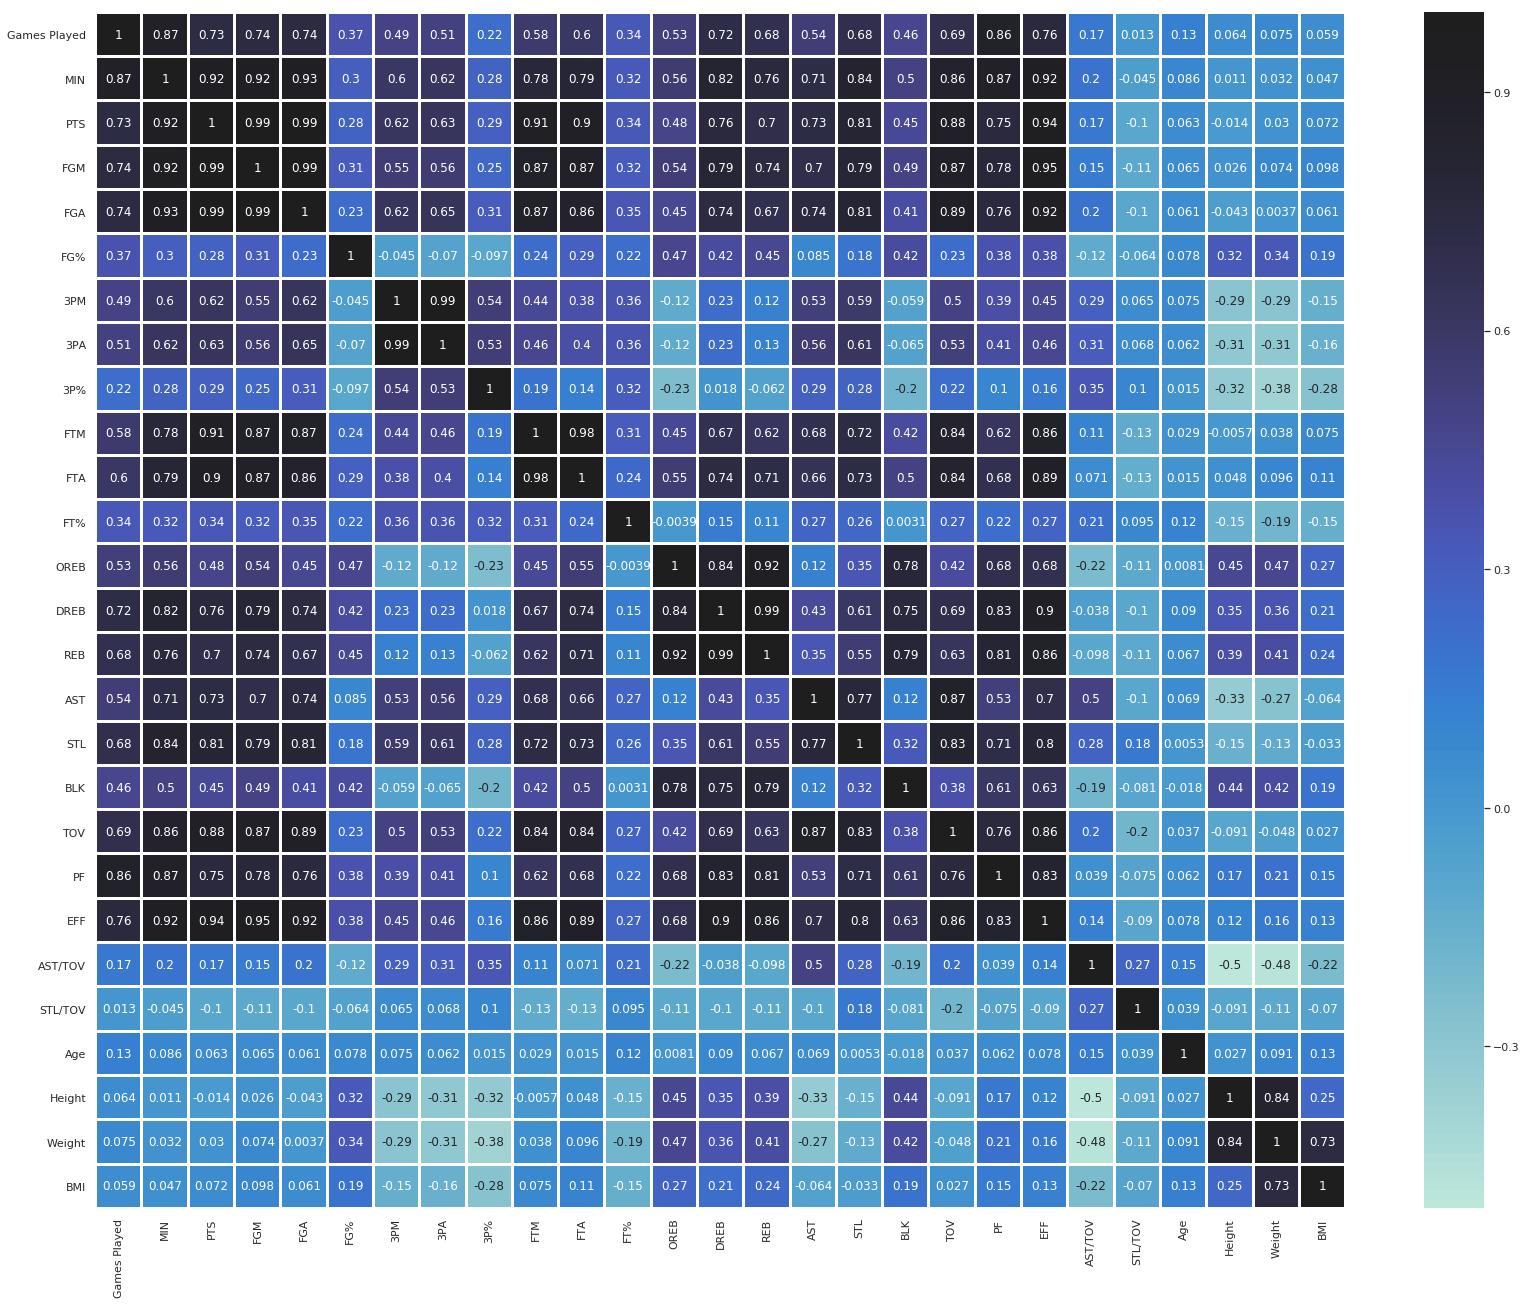

In [78]:
seaborn.set(rc = {'figure.figsize':(28,22)})
corr = data.corr()
seaborn.heatmap(corr , xticklabels = corr.columns.values,yticklabels = corr.columns.values , center = 1 , linewidths = 2 , annot = True)

In [0]:
high_corr_pairs = numpy.where(corr > 0.92)
high_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

In [84]:
high_corr_pairs

[('MIN', 'PTS'),
 ('MIN', 'FGM'),
 ('MIN', 'FGA'),
 ('MIN', 'EFF'),
 ('PTS', 'FGM'),
 ('PTS', 'FGA'),
 ('PTS', 'EFF'),
 ('FGM', 'FGA'),
 ('FGM', 'EFF'),
 ('3PM', '3PA'),
 ('FTM', 'FTA'),
 ('OREB', 'REB'),
 ('DREB', 'REB')]

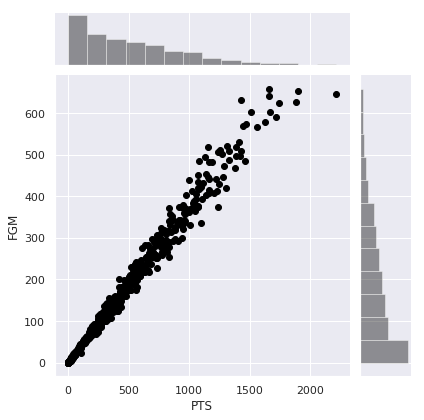

In [85]:
seaborn.jointplot(data.PTS , data.FGM , color='Black' , kind = 'scatter')

**Age wise distribution of 3P%**

Text(0.5, 0, 'Age axis')

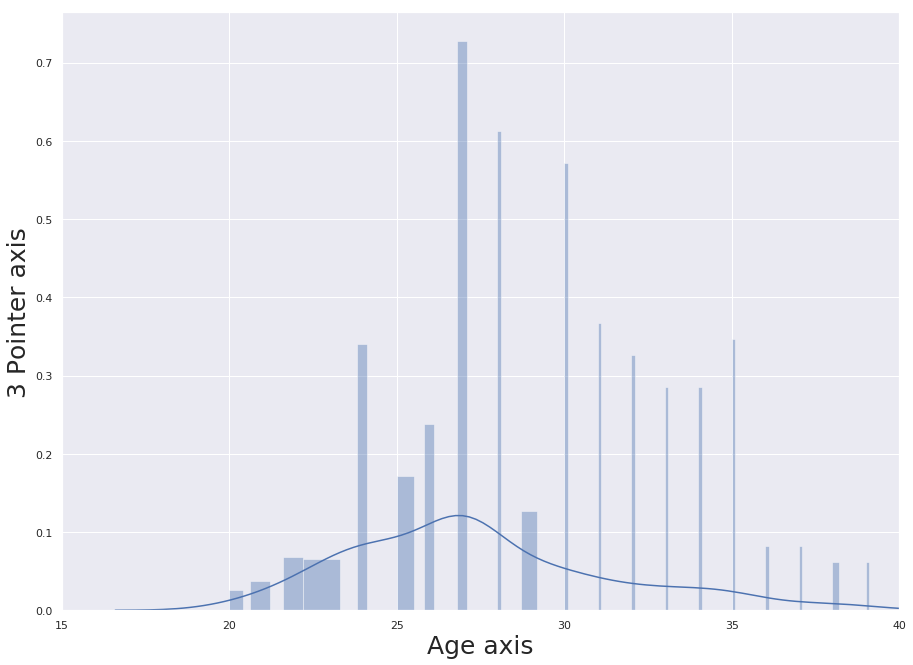

In [86]:
seaborn.set(rc = {'figure.figsize':(15,11)})
pyplot.xlim(15,40)
seaborn.distplot(data['Age'] , numpy.sort(data['3P%'].unique()))
pyplot.ylabel('3 Pointer axis' , fontdict = {'size' : 25})
pyplot.xlabel('Age axis' , fontdict = {'size' : 25})

**Position Breakdown using pie chart**

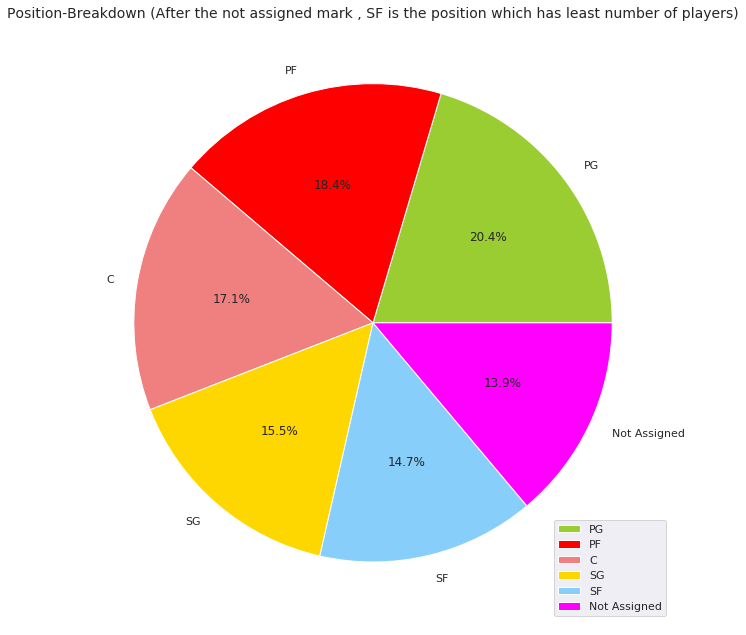

In [0]:
labels = data['Pos'].unique().tolist()
size = data['Pos'].value_counts().tolist()
colors = ['yellowgreen' , 'red' , 'lightcoral' , 'gold' , 'lightskyblue' , 'magenta']
pyplot.title('Position-Breakdown (After the not assigned mark , SF is the position which has least number of players)' , fontdict = {'size' : 14})
pyplot.pie(size , labels = labels , colors = colors , autopct = '%1.1f%%')
pyplot.legend()
pyplot.show()

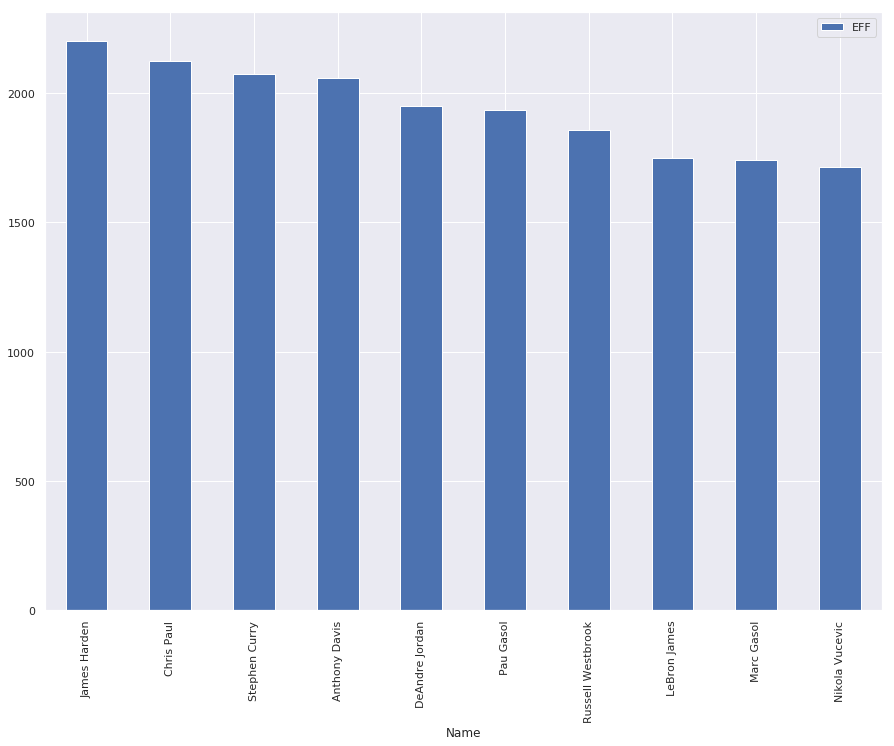

In [0]:
data.sort_values('EFF', ascending = False).head(10)[['Name','EFF']].plot(x = 'Name', y = 'EFF', kind = 'bar')